In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("alt_freq_stats.tsv", sep="\t")
df

,library,aligner,mean,stdev
0,13_Standard_American_RhodeIsland_Red,giraffe,0.496519,0.000085
1,13_Standard_American_RhodeIsland_Red,minimap,0.493738,0.000093
2,198_RedJungleFowl,giraffe,0.495670,0.000094
3,198_RedJungleFowl,minimap,0.493005,0.000103
4,159_Standard_Asiatic_Cochin_Blue,giraffe,0.495777,0.000090
...,...,...,...,...
195,5_Standard_Continental_Hamburg_SilverSpangled,minimap,0.491253,0.000136
196,63_Standard_Mediterranean_Leghorn_White,giraffe,0.496900,0.000082
197,63_Standard_Mediterranean_Leghorn_White,minimap,0.494361,0.000088
198,8_Standard_Mediterranean_Leghorn_Blue,giraffe,0.496902,0.000079


In [3]:
df["sample"] = df.library.str.split("_", expand=True).iloc[:, 0]
df

,library,aligner,mean,stdev,sample
0,13_Standard_American_RhodeIsland_Red,giraffe,0.496519,0.000085,13
1,13_Standard_American_RhodeIsland_Red,minimap,0.493738,0.000093,13
2,198_RedJungleFowl,giraffe,0.495670,0.000094,198
3,198_RedJungleFowl,minimap,0.493005,0.000103,198
4,159_Standard_Asiatic_Cochin_Blue,giraffe,0.495777,0.000090,159
...,...,...,...,...,...
195,5_Standard_Continental_Hamburg_SilverSpangled,minimap,0.491253,0.000136,5
196,63_Standard_Mediterranean_Leghorn_White,giraffe,0.496900,0.000082,63
197,63_Standard_Mediterranean_Leghorn_White,minimap,0.494361,0.000088,63
198,8_Standard_Mediterranean_Leghorn_Blue,giraffe,0.496902,0.000079,8


In [4]:
df[df.aligner == "giraffe"].sort_values(by="mean").head()

,library,aligner,mean,stdev,sample
30,158_Standard_Asiatic_Cochin_Barred,giraffe,0.475114,0.000076,158
50,186_Standard_Continental_Hamburg_SilverSpangled,giraffe,0.492338,0.000129,186
48,183_Standard_Oriental_Yokohama_SilverDuckwing,giraffe,0.492520,0.000091,183
186,46_Standard_Continental_Faverolle_Salmon,giraffe,0.492879,0.000089,46
146,275_Bantam_FeatherLegged_Cochin_Buff,giraffe,0.493304,0.000116,275


In [5]:
df[df.aligner == "giraffe"].sort_values(by="mean").tail()

,library,aligner,mean,stdev,sample
196,63_Standard_Mediterranean_Leghorn_White,giraffe,0.496900,0.000082,63
198,8_Standard_Mediterranean_Leghorn_Blue,giraffe,0.496902,0.000079,8
142,273_Bantam_FeatherLegged_Cochin_Red,giraffe,0.496960,0.000075,273
26,153_Standard_Continental_Marans_Black,giraffe,0.496993,0.000076,153
168,293_Standard_American_PlymouthRock_Barred,giraffe,0.496997,0.000080,293


In [6]:
main_figure_samples = [
    "8_Standard_Mediterranean_Leghorn_Blue",
    "13_Standard_American_RhodeIsland_Red",
    "47_Standard_Oriental_Phoenix_Silver",
    "63_Standard_Mediterranean_Leghorn_White",
    "159_Standard_Asiatic_Cochin_Blue",
    "180_Bantam_Game_OldEnglishGame_BrassyBack",
    "186_Standard_Continental_Hamburg_SilverSpangled",
    "198_RedJungleFowl",
    "209_Standard_American_Dominique_NoVariety",
    "214_Standard_Oriental_Phoenix_BlackBreastedRed",
    "228_Standard_American_Wyandotte_BlackLacedRed",
    "245_Standard_Oriental_Phoenix_Silver",
    "248_Bantam_RoseCombCleanLegged_Sebright_Silver",
    "293_Standard_American_PlymouthRock_Barred",
]

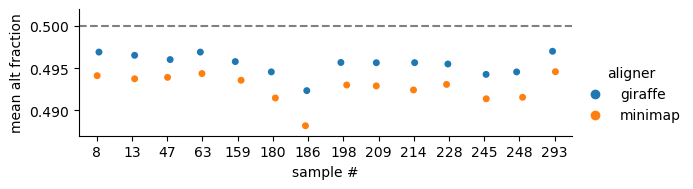

In [7]:
g = sns.catplot(
    df[df.library.isin(main_figure_samples)],
    x="sample",
    y="mean",
    hue="aligner",
    order=[s.split("_")[0] for s in main_figure_samples],
    aspect=3,
    height=2,
)
g.set(ylim=(0.487, 0.502), xlabel="sample #", ylabel="mean alt fraction")
plt.axhline(0.5, color="grey", linestyle="--")
plt.savefig("main_figure_panel.pdf")

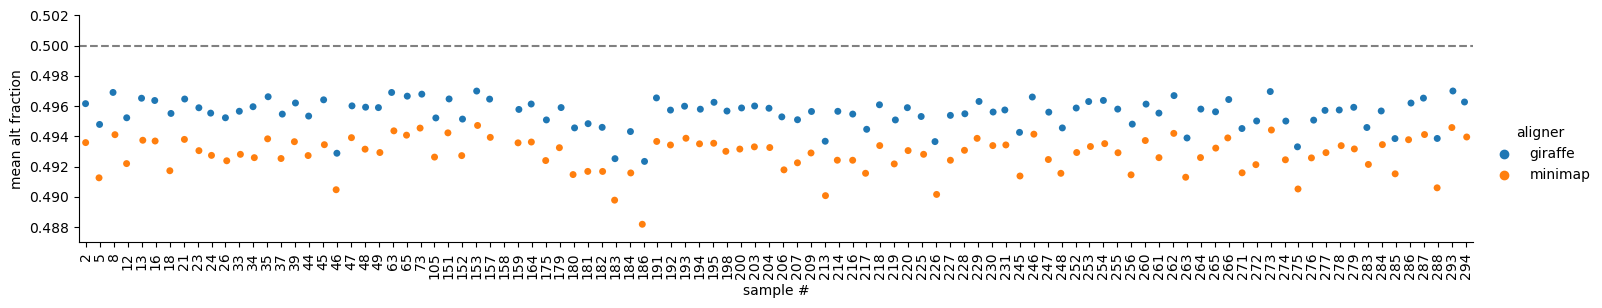

In [12]:
g = sns.catplot(
    df,
    x="sample",
    y="mean",
    hue="aligner",
    aspect=5,
    height=3,
    order=list(map(str, sorted(map(int, df["sample"].unique())))),
)
g.set(ylim=(0.487, 0.502), xlabel="sample #", ylabel="mean alt fraction")
plt.axhline(0.5, color="grey", linestyle="--")
_ = plt.xticks(rotation=90)
plt.savefig("Supplementary_Figure_S5.pdf")
plt.savefig("Supplementary_Figure_S5.png")

In [9]:
pv = df.pivot(index="library", columns="aligner", values="mean")
pv["giraffe_bias"] = 0.5 - pv["giraffe"]
pv["minimap_bias"] = 0.5 - pv["minimap"]
pv["bias_reduction"] = (pv["minimap_bias"] - pv["giraffe_bias"])/pv["minimap_bias"]
pv

aligner,giraffe,minimap,giraffe_bias,minimap_bias,bias_reduction
library,,,,,
105_Bantam_RoseCombCleanLegged_Rosecomb_Blue,0.495215,0.492624,0.004785,0.007376,0.351274
12_Bantam_FeatherLegged_Brahma_Dark,0.495225,0.492194,0.004775,0.007806,0.388291
13_Standard_American_RhodeIsland_Red,0.496519,0.493738,0.003481,0.006262,0.444107
151_Standard_American_PlymouthRock_White,0.496471,0.494228,0.003529,0.005772,0.388600
152_Standard_Asiatic_Cochin_White,0.495139,0.492722,0.004861,0.007278,0.332097
...,...,...,...,...,...
5_Standard_Continental_Hamburg_SilverSpangled,0.494784,0.491253,0.005216,0.008747,0.403681
63_Standard_Mediterranean_Leghorn_White,0.496900,0.494361,0.003100,0.005639,0.450257
65_Standard_Mediterranean_Leghorn_White,0.496656,0.494075,0.003344,0.005925,0.435612


In [10]:
pv["bias_reduction"].mean()

0.38243677170037393